In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
print(device)

cpu


# Prepare training dataset

In [4]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [5]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [7]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [11]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [12]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [13]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [14]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  1%|          | 1/117 [00:00<00:43,  2.68it/s]

118it [00:30,  3.90it/s]                         


Epoch 1 of 100
Generator loss: 1.64894807, Discriminator loss: 0.42349944


118it [00:31,  3.80it/s]                         


Epoch 2 of 100
Generator loss: 3.33505368, Discriminator loss: 0.60339803


118it [00:31,  3.77it/s]                         


Epoch 3 of 100
Generator loss: 5.92743683, Discriminator loss: 0.12892799


118it [00:31,  3.76it/s]                         


Epoch 4 of 100
Generator loss: 3.09145784, Discriminator loss: 0.55241477


118it [00:31,  3.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


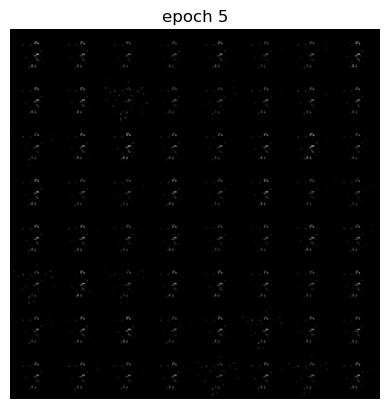

Epoch 5 of 100
Generator loss: 1.62574542, Discriminator loss: 0.54824138


118it [00:32,  3.68it/s]                         


Epoch 6 of 100
Generator loss: 1.96078646, Discriminator loss: 0.40854788


118it [00:32,  3.66it/s]                         


Epoch 7 of 100
Generator loss: 1.64491105, Discriminator loss: 0.47948152


118it [00:32,  3.66it/s]                         


Epoch 8 of 100
Generator loss: 1.78304088, Discriminator loss: 0.47874564


118it [00:32,  3.62it/s]                         


Epoch 9 of 100
Generator loss: 1.80244720, Discriminator loss: 0.51409018


118it [00:33,  3.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


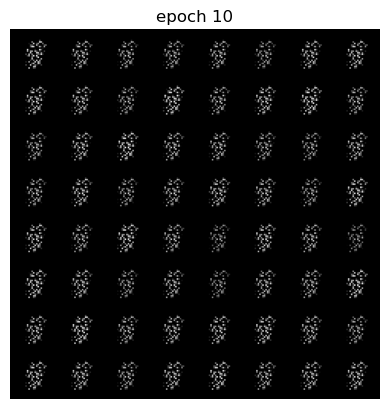

Epoch 10 of 100
Generator loss: 2.18668675, Discriminator loss: 0.52729130


118it [00:33,  3.56it/s]                         


Epoch 11 of 100
Generator loss: 3.08351326, Discriminator loss: 0.57322949


118it [00:33,  3.52it/s]                         


Epoch 12 of 100
Generator loss: 1.82327843, Discriminator loss: 0.39318857


118it [00:34,  3.45it/s]                         


Epoch 13 of 100
Generator loss: 2.82028818, Discriminator loss: 0.41023314


118it [00:33,  3.48it/s]                         


Epoch 14 of 100
Generator loss: 2.54886389, Discriminator loss: 0.28230473


118it [00:33,  3.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


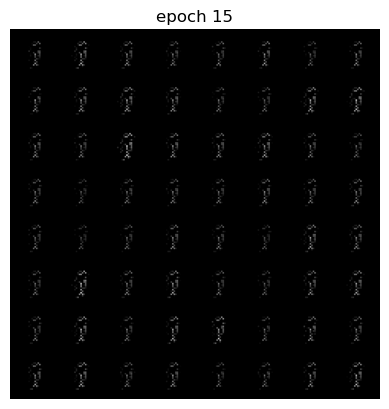

Epoch 15 of 100
Generator loss: 3.20713663, Discriminator loss: 0.28565323


118it [00:34,  3.45it/s]                         


Epoch 16 of 100
Generator loss: 3.10538292, Discriminator loss: 0.22970858


118it [00:34,  3.47it/s]                         


Epoch 17 of 100
Generator loss: 3.39058352, Discriminator loss: 0.22482336


118it [00:34,  3.46it/s]                         


Epoch 18 of 100
Generator loss: 2.97616124, Discriminator loss: 0.29619187


118it [00:34,  3.38it/s]                         


Epoch 19 of 100
Generator loss: 3.42956042, Discriminator loss: 0.23315458


118it [01:49,  1.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


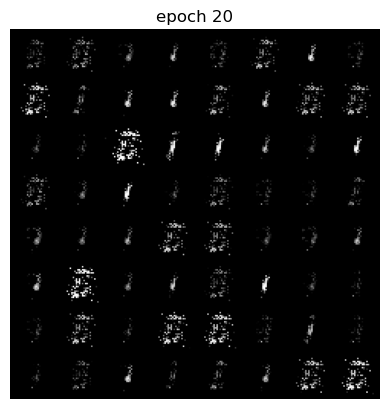

Epoch 20 of 100
Generator loss: 3.38384676, Discriminator loss: 0.19698827


118it [00:34,  3.46it/s]                         


Epoch 21 of 100
Generator loss: 3.39166594, Discriminator loss: 0.22092348


118it [00:34,  3.43it/s]                         


Epoch 22 of 100
Generator loss: 3.50918388, Discriminator loss: 0.20472205


118it [00:33,  3.49it/s]                         


Epoch 23 of 100
Generator loss: 3.49488378, Discriminator loss: 0.20192869


118it [00:33,  3.54it/s]                         


Epoch 24 of 100
Generator loss: 3.18765807, Discriminator loss: 0.24782100


118it [00:33,  3.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


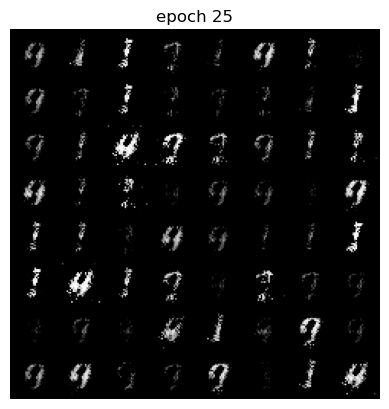

Epoch 25 of 100
Generator loss: 2.86442232, Discriminator loss: 0.24239777


118it [00:33,  3.52it/s]                         


Epoch 26 of 100
Generator loss: 2.78866386, Discriminator loss: 0.28306800


118it [00:33,  3.51it/s]                         


Epoch 27 of 100
Generator loss: 3.07070017, Discriminator loss: 0.23217905


118it [00:33,  3.47it/s]                         


Epoch 28 of 100
Generator loss: 3.19011426, Discriminator loss: 0.19699687


118it [00:33,  3.49it/s]                         


Epoch 29 of 100
Generator loss: 3.17743802, Discriminator loss: 0.22038144


118it [00:34,  3.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


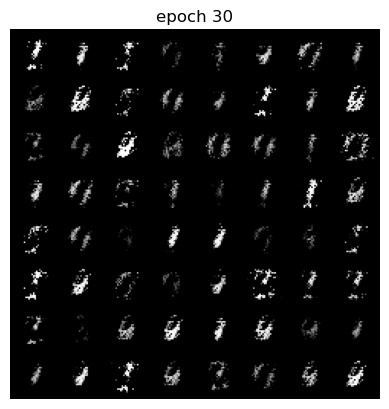

Epoch 30 of 100
Generator loss: 3.16550016, Discriminator loss: 0.23538058


118it [00:34,  3.40it/s]                         


Epoch 31 of 100
Generator loss: 3.23295927, Discriminator loss: 0.26374355


118it [00:34,  3.44it/s]                         


Epoch 32 of 100
Generator loss: 3.02796960, Discriminator loss: 0.24654561


118it [00:34,  3.44it/s]                         


Epoch 33 of 100
Generator loss: 3.55172706, Discriminator loss: 0.17229514


118it [00:34,  3.44it/s]                         


Epoch 34 of 100
Generator loss: 3.32400680, Discriminator loss: 0.21138737


118it [00:34,  3.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


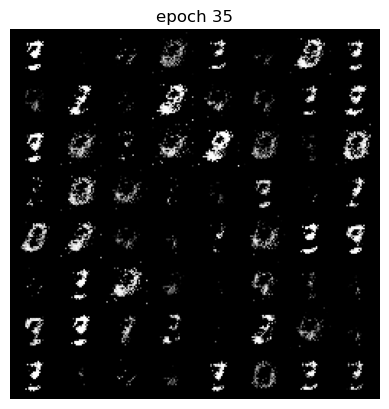

Epoch 35 of 100
Generator loss: 3.14996457, Discriminator loss: 0.23634090


118it [00:34,  3.42it/s]                         


Epoch 36 of 100
Generator loss: 3.34951115, Discriminator loss: 0.20863943


118it [00:34,  3.38it/s]                         


Epoch 37 of 100
Generator loss: 3.17375994, Discriminator loss: 0.23168935


118it [04:50,  2.46s/it]                         


Epoch 38 of 100
Generator loss: 3.16435933, Discriminator loss: 0.23415773


118it [00:36,  3.24it/s]                         


Epoch 39 of 100
Generator loss: 3.11973047, Discriminator loss: 0.22108327


118it [00:33,  3.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


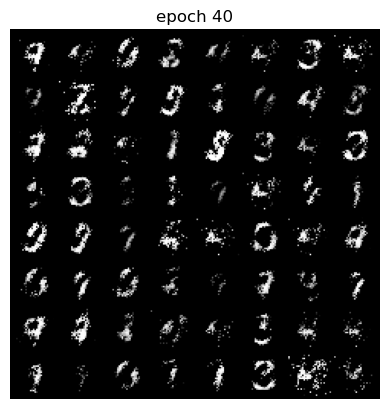

Epoch 40 of 100
Generator loss: 3.03662443, Discriminator loss: 0.24434246


118it [00:34,  3.38it/s]                         


Epoch 41 of 100
Generator loss: 3.26003122, Discriminator loss: 0.23287740


118it [00:33,  3.56it/s]                         


Epoch 42 of 100
Generator loss: 3.54121852, Discriminator loss: 0.19302781


118it [00:33,  3.54it/s]                         


Epoch 43 of 100
Generator loss: 3.53115582, Discriminator loss: 0.22973779


118it [00:33,  3.54it/s]                         


Epoch 44 of 100
Generator loss: 3.32938218, Discriminator loss: 0.24064919


118it [00:33,  3.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


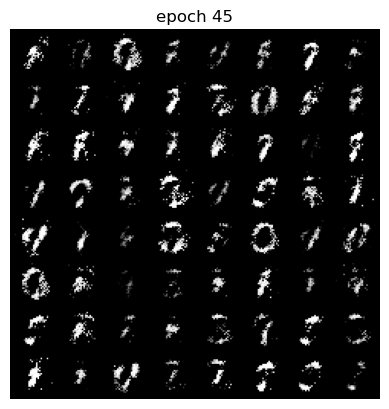

Epoch 45 of 100
Generator loss: 3.37154675, Discriminator loss: 0.21274233


118it [00:33,  3.51it/s]                         


Epoch 46 of 100
Generator loss: 3.00944352, Discriminator loss: 0.25339550


118it [00:33,  3.51it/s]                         


Epoch 47 of 100
Generator loss: 2.80704403, Discriminator loss: 0.26736990


118it [00:33,  3.49it/s]                         


Epoch 48 of 100
Generator loss: 3.19315720, Discriminator loss: 0.23096696


118it [00:33,  3.51it/s]                         


Epoch 49 of 100
Generator loss: 3.09688520, Discriminator loss: 0.23368253


118it [00:33,  3.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


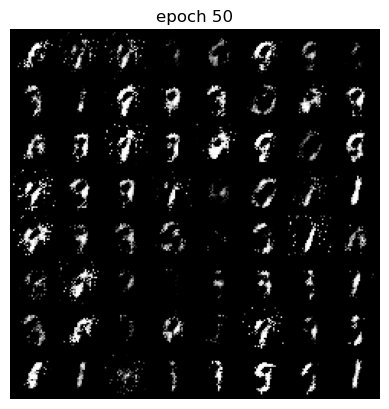

Epoch 50 of 100
Generator loss: 3.16573024, Discriminator loss: 0.26145130


118it [00:33,  3.49it/s]                         


Epoch 51 of 100
Generator loss: 2.84638906, Discriminator loss: 0.26647559


118it [00:33,  3.49it/s]                         


Epoch 52 of 100
Generator loss: 2.81834173, Discriminator loss: 0.26465717


118it [00:33,  3.50it/s]                         


Epoch 53 of 100
Generator loss: 2.63125491, Discriminator loss: 0.29752043


118it [00:33,  3.48it/s]                         


Epoch 54 of 100
Generator loss: 2.66439581, Discriminator loss: 0.29797539


118it [00:33,  3.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


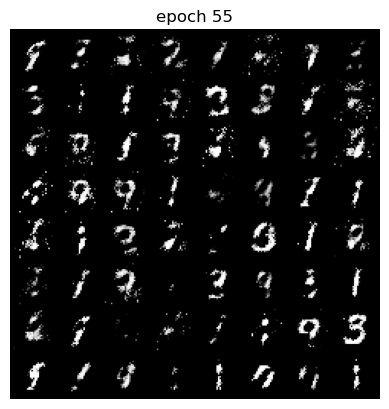

Epoch 55 of 100
Generator loss: 2.59977007, Discriminator loss: 0.27976489


118it [00:34,  3.46it/s]                         


Epoch 56 of 100
Generator loss: 2.73909450, Discriminator loss: 0.28830120


118it [00:34,  3.45it/s]                         


Epoch 57 of 100
Generator loss: 2.53823876, Discriminator loss: 0.31228599


118it [07:08,  3.63s/it]                           


Epoch 58 of 100
Generator loss: 2.56801033, Discriminator loss: 0.29876226


118it [00:33,  3.52it/s]                         


Epoch 59 of 100
Generator loss: 2.82901788, Discriminator loss: 0.27536544


118it [00:33,  3.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


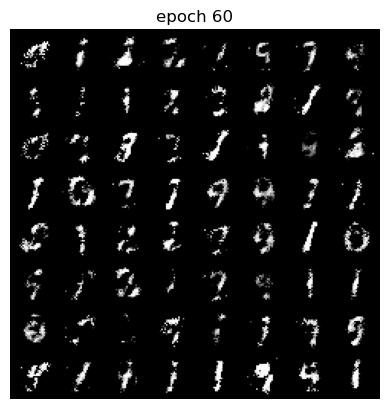

Epoch 60 of 100
Generator loss: 2.69820666, Discriminator loss: 0.26091400


118it [00:33,  3.56it/s]                         


Epoch 61 of 100
Generator loss: 2.64929080, Discriminator loss: 0.29644951


118it [00:33,  3.53it/s]                         


Epoch 62 of 100
Generator loss: 2.70239353, Discriminator loss: 0.29073051


118it [00:33,  3.51it/s]                         


Epoch 63 of 100
Generator loss: 2.61055493, Discriminator loss: 0.30509540


118it [00:33,  3.56it/s]                         


Epoch 64 of 100
Generator loss: 2.65235925, Discriminator loss: 0.29903841


118it [00:33,  3.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


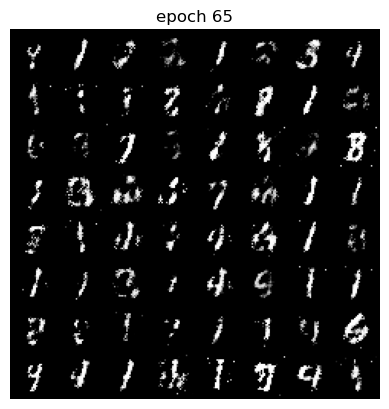

Epoch 65 of 100
Generator loss: 2.45170784, Discriminator loss: 0.31717259


118it [00:33,  3.54it/s]                         


Epoch 66 of 100
Generator loss: 2.45018530, Discriminator loss: 0.30831954


118it [00:33,  3.56it/s]                         


Epoch 67 of 100
Generator loss: 2.43444538, Discriminator loss: 0.29982716


118it [00:33,  3.51it/s]                         


Epoch 68 of 100
Generator loss: 2.36326981, Discriminator loss: 0.30969462


118it [00:33,  3.55it/s]                         


Epoch 69 of 100
Generator loss: 2.48292303, Discriminator loss: 0.30560878


118it [00:33,  3.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


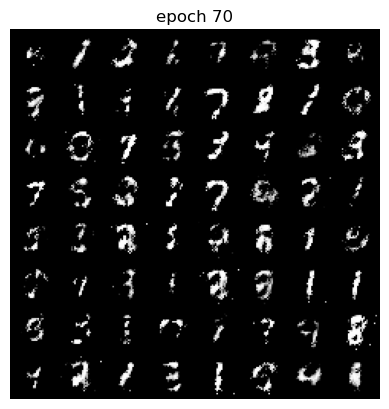

Epoch 70 of 100
Generator loss: 2.40081739, Discriminator loss: 0.32803887


118it [00:33,  3.53it/s]                         


Epoch 71 of 100
Generator loss: 2.23024631, Discriminator loss: 0.34476751


118it [00:33,  3.52it/s]                         


Epoch 72 of 100
Generator loss: 2.34919381, Discriminator loss: 0.31972614


118it [00:33,  3.53it/s]                         


Epoch 73 of 100
Generator loss: 2.35858679, Discriminator loss: 0.32693478


118it [00:33,  3.55it/s]                         


Epoch 74 of 100
Generator loss: 2.44349933, Discriminator loss: 0.32450458


118it [00:33,  3.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


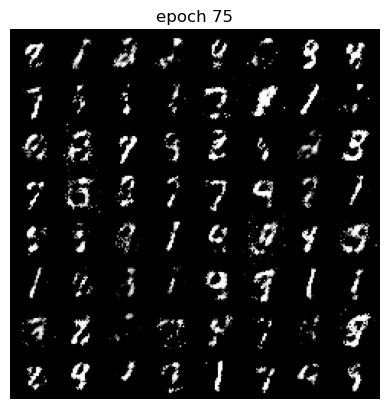

Epoch 75 of 100
Generator loss: 2.42187285, Discriminator loss: 0.32380682


118it [00:33,  3.54it/s]                         


Epoch 76 of 100
Generator loss: 2.22893071, Discriminator loss: 0.33429229


118it [00:33,  3.53it/s]                         


Epoch 77 of 100
Generator loss: 2.30588865, Discriminator loss: 0.33761820


118it [04:49,  2.46s/it]                         


Epoch 78 of 100
Generator loss: 2.32928133, Discriminator loss: 0.36336279


118it [00:31,  3.75it/s]                         


Epoch 79 of 100
Generator loss: 2.16899467, Discriminator loss: 0.36438787


118it [00:33,  3.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


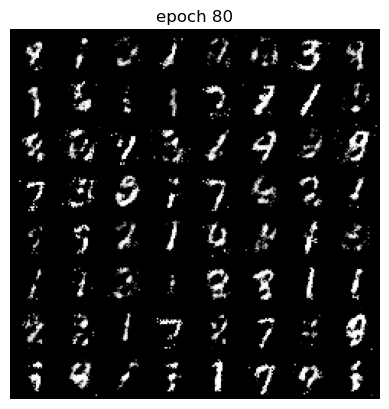

Epoch 80 of 100
Generator loss: 2.18258905, Discriminator loss: 0.34302419


118it [00:33,  3.57it/s]                         


Epoch 81 of 100
Generator loss: 2.14666367, Discriminator loss: 0.36438820


118it [00:32,  3.63it/s]                         


Epoch 82 of 100
Generator loss: 2.06051660, Discriminator loss: 0.36130604


118it [00:32,  3.61it/s]                         


Epoch 83 of 100
Generator loss: 2.17436385, Discriminator loss: 0.35393140


118it [00:32,  3.60it/s]                         


Epoch 84 of 100
Generator loss: 2.10137677, Discriminator loss: 0.36748508


118it [00:32,  3.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


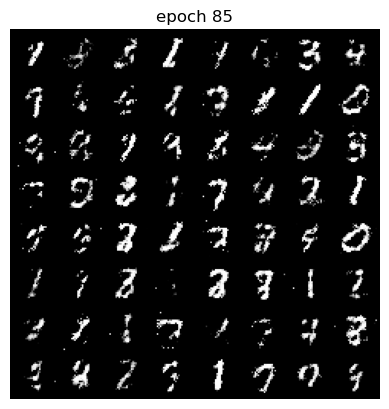

Epoch 85 of 100
Generator loss: 2.15639091, Discriminator loss: 0.36817399


118it [00:33,  3.54it/s]                         


Epoch 86 of 100
Generator loss: 2.19155979, Discriminator loss: 0.37742463


118it [00:32,  3.59it/s]                         


Epoch 87 of 100
Generator loss: 1.96972382, Discriminator loss: 0.38758391


118it [00:32,  3.59it/s]                         


Epoch 88 of 100
Generator loss: 2.11985970, Discriminator loss: 0.36943969


118it [00:32,  3.59it/s]                         


Epoch 89 of 100
Generator loss: 2.05394506, Discriminator loss: 0.39015412


118it [00:32,  3.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


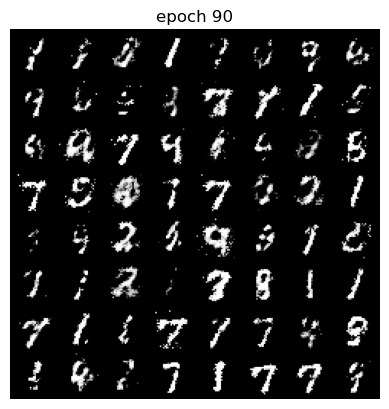

Epoch 90 of 100
Generator loss: 2.07694077, Discriminator loss: 0.37643886


118it [00:32,  3.62it/s]                         


Epoch 91 of 100
Generator loss: 2.08301520, Discriminator loss: 0.36777249


118it [00:33,  3.56it/s]                         


Epoch 92 of 100
Generator loss: 2.04269695, Discriminator loss: 0.37683031


118it [00:32,  3.58it/s]                         


Epoch 93 of 100
Generator loss: 2.00917912, Discriminator loss: 0.37951222


118it [00:32,  3.62it/s]                         


Epoch 94 of 100
Generator loss: 2.02180052, Discriminator loss: 0.38492176


118it [00:32,  3.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


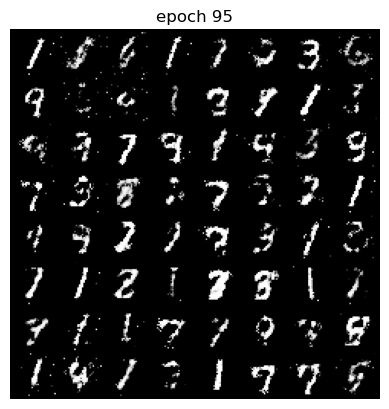

Epoch 95 of 100
Generator loss: 2.06532860, Discriminator loss: 0.38227740


118it [00:32,  3.62it/s]                         


Epoch 96 of 100
Generator loss: 1.96714807, Discriminator loss: 0.39846149


118it [00:32,  3.67it/s]                         


Epoch 97 of 100
Generator loss: 1.95972645, Discriminator loss: 0.41050294


118it [05:46,  2.94s/it]                          


Epoch 98 of 100
Generator loss: 1.97099340, Discriminator loss: 0.40273473


118it [00:29,  3.97it/s]                         


Epoch 99 of 100
Generator loss: 1.94839048, Discriminator loss: 0.39481497


118it [00:30,  3.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


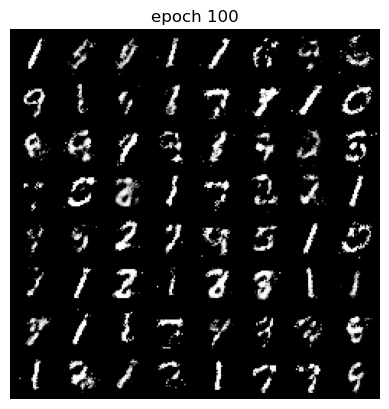

Epoch 100 of 100
Generator loss: 1.92864835, Discriminator loss: 0.40504685


In [15]:
torch.manual_seed(7777)

def generator_loss(fake_images):
    local_size = len(fake_images)
    real_label = label_real(local_size)
    optim_g.zero_grad()
    fake_output = discriminator(fake_images)
    loss = criterion(fake_output, real_label)
    loss.backward()
    optim_g.step()

    return loss

def discriminator_loss(fake_images, original_images):
    fake_local_size = len(fake_images)
    real_local_size = len(original_images)
    real_label = label_real(real_local_size)
    fake_label = label_fake(fake_local_size)
    optim_d.zero_grad()

    real_output = discriminator(original_images)
    loss_real = criterion(real_output, real_label)

    fake_output = discriminator(fake_images)
    loss_fake = criterion(fake_output, fake_label)

    total_loss = loss_real + loss_fake
    total_loss.backward()
    optim_d.step()

    return total_loss



for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        real_images = data[0].to(device)
        for _ in range(k):
            new_noise = create_noise(batch_size, nz).detach()
            fake_images = generator(new_noise)
            loss_d += discriminator_loss(fake_images, real_images)/2

        fakes = generator(create_noise(batch_size, nz).detach())
        loss_g += generator_loss(fakes)

    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [16]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [17]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

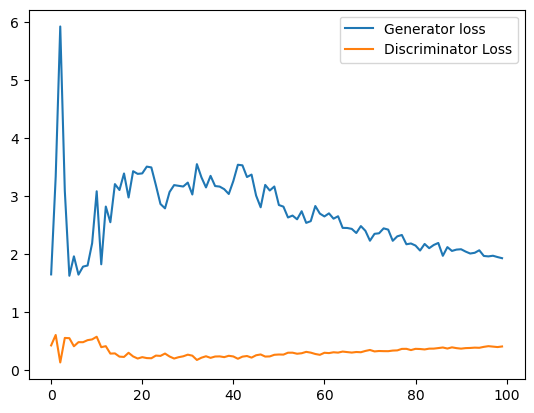

In [18]:
# plot and save the generator and discriminator loss
losses_g_n = [tensor.detach().numpy() for tensor in losses_g]
losses_d_n = [tensor.detach().numpy() for tensor in losses_d]
plt.figure()
plt.plot(losses_g_n, label='Generator loss')
plt.plot(losses_d_n, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')